# Analisis Predictivo para una Tienda Minorista

## Objetivo
Desarrollar un modelo predictivo para una tienda minorista que desea pronosticar las ventas, basandose en diversas caracteristicas. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta informacion para tomar desiciones informadas sobre la _gestion de inventario, promociones y programacion de personal_.

Construir un modelo que pueda **predecir el total de ventas para el prosimo mes**, utilizando datos de los meses anteriores.

## Tarea

### 1. Preparacion de datos
   * Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, seleccion de **variables dependientes**, **independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.

### 2. Analisis Exploratorio de Datos (EDA)

   * Realiza un EDA para entender la distribucion de las ventas y la relacion entre las ventas y otras caracteristicas. Esto podria incluir trazar las ventas a lo largo del tiempo, analizar las ventas en _festivos vs no festivos_ y el impacto de las promociones.

### 3. Seleccion de Modelo

   * Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo mas adecuado para esta tarea. Considera la **Regresion Lineal**, Los **Arboles de Decision** y los **Bosques Aleatorios**.

### 4. Entrenamiento y Evaluacion del Modelo

   * Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalua su rendimiento utilizando el conjunto de prueba. Utiliza graficos para visualizar las _ventas reales vs las predichas_.

### 5. Conclusion

   * Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre como utilizar el analisis predictivo para una mejor toma de decisiones.

### 1. Preparacion de Datos

In [1]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Definir la ruta del dataset
ruta = '/_DATA/Ventas_ML.csv'

# Cargar el Dataset
df = pd.read_csv(ruta)
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [3]:
# Comprobar si hay valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [4]:
# Convertir la columna "Fecha" a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [5]:
escala = MinMaxScaler(feature_range=(0, 1))

# Eliminamos las columnas no deseadas y guardamos los nombres de las columnas que vamos a escalar
columnas_para_escalar = df.drop(['Fecha', 'Ventas'], axis=1).columns

# Ajustamos el MinMaxScaler a las columnas restantes y transformamos los datos
normado = escala.fit_transform(df[columnas_para_escalar])

# Creamos un nuevo DataFrame con los datos normalizados y las columnas correctas
df_normado = pd.DataFrame(data = normado, columns=columnas_para_escalar)

# Si necesitas, puedes agregar las colunas no escaladas que has quitado previamente
df_normado['Ventas'] = df['Ventas']
df_normado['Fecha'] = df['Fecha']

# Ahora df_normado tiene los datos normalizados y las columnas no normalizadas originales
df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [6]:
# Comprobamos que el tipo de dato fecha ya este en datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [7]:
# Identificamos las variables dependientes e independientes
X = df_normado.drop(['Ventas', 'Fecha'], axis=1)
y = df['Ventas']

In [8]:
# Dividir en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

### 2. Analisis Exploratorio de Datos (EDA)

In [9]:
# Estadisticas descriptivas
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


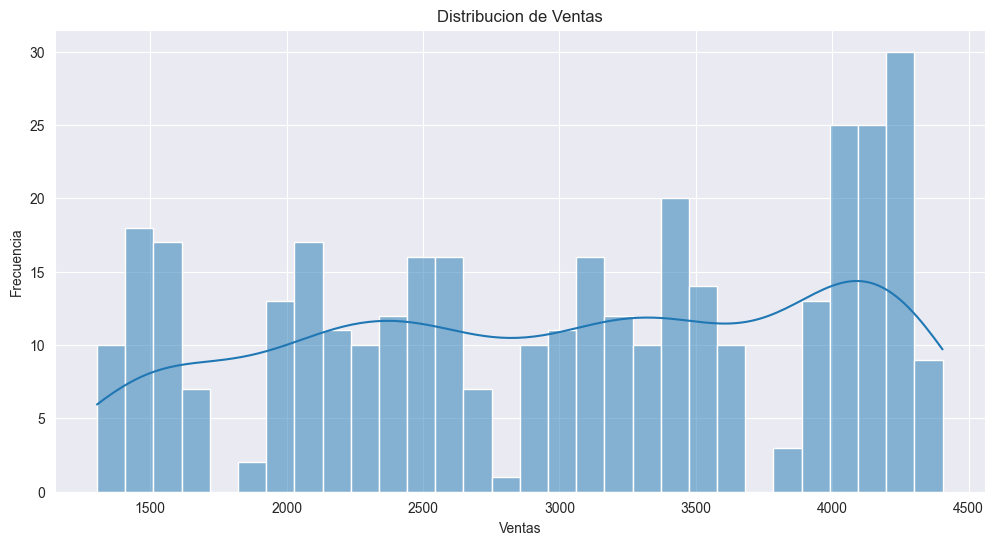

In [10]:
# Visualizacion de la distribucion de ventas
plt.figure(figsize=(12, 6))
sns.histplot(df['Ventas'], bins=30, kde=True)
plt.title('Distribucion de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia');

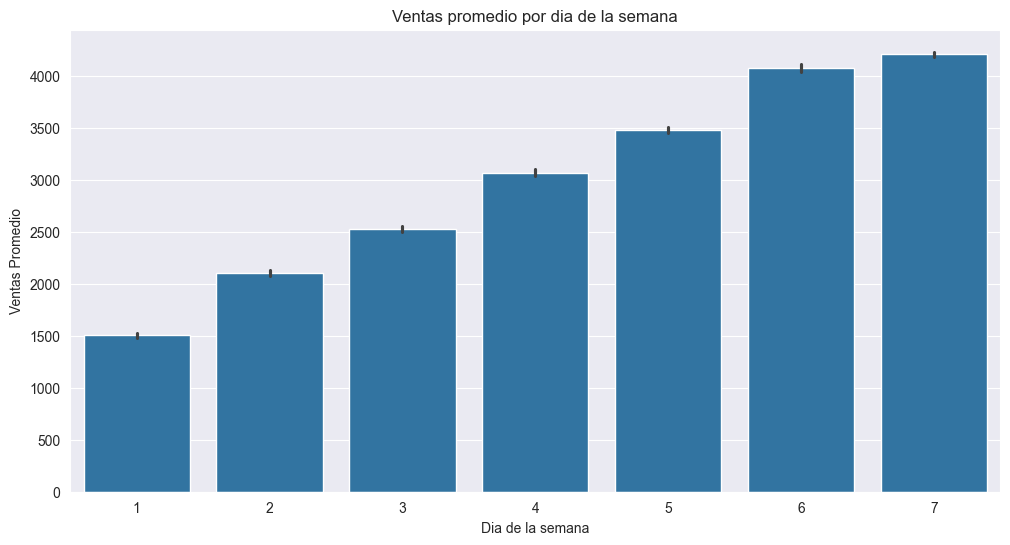

In [11]:
# Relacion entre ventas y dia de la semana con promedio de ventas
plt.figure(figsize = (12, 6))
sns.barplot(data = df, x = 'DíaDeLaSemana', y = 'Ventas')
plt.title('Ventas promedio por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Ventas Promedio');

Text(0.5, 1.0, 'Interaccion entre Promociones y Dias Festivos en las Ventas')

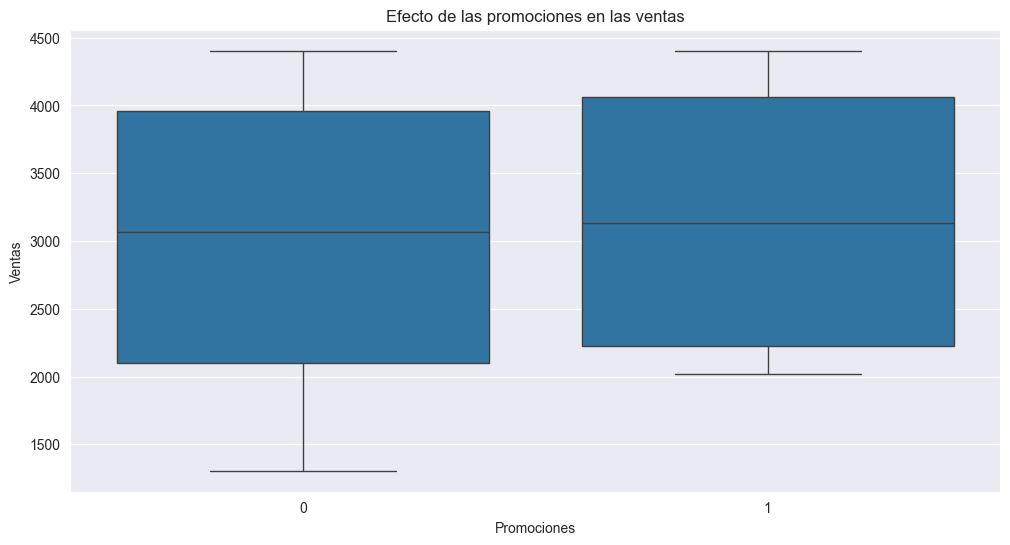

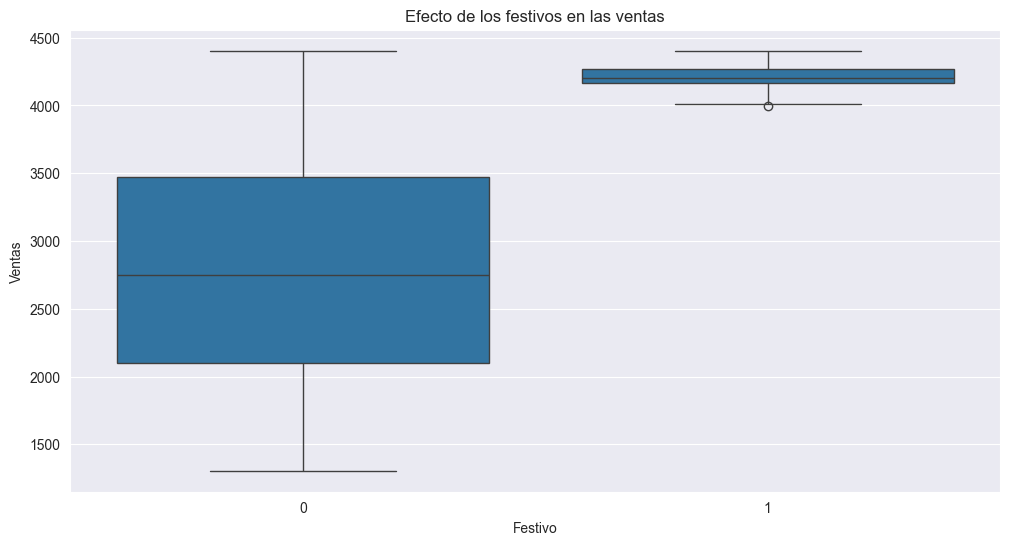

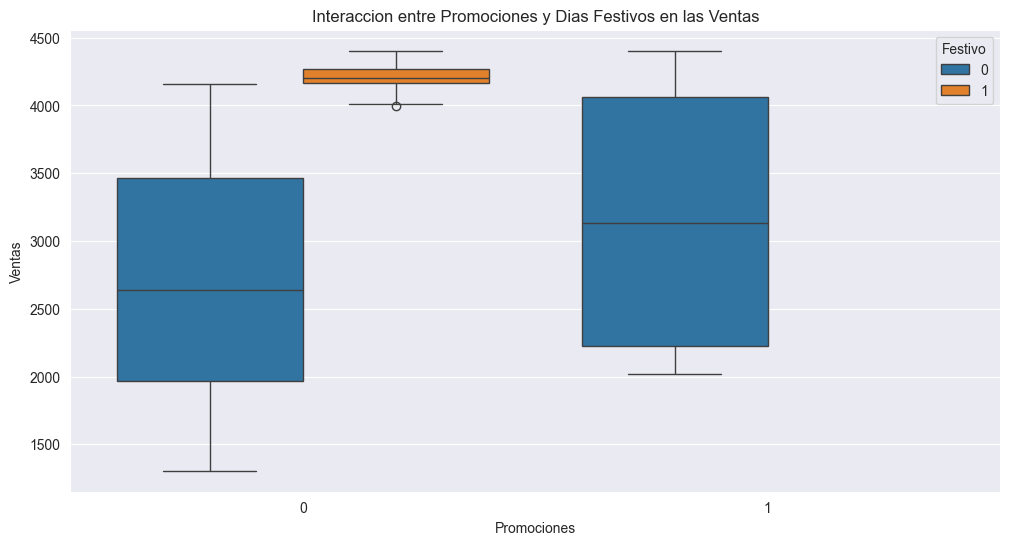

In [12]:
# boxplot para comparar las ventas con y sin promociones
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Promociones', y = 'Ventas', data = df)
plt.title('Efecto de las promociones en las ventas')

# boxplot para comparar las ventas para los dias normales y festivos
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Festivo', y = 'Ventas', data = df)
plt.title('Efecto de los festivos en las ventas')

# boxplot para ver la interaccion entre promociones y dias festivos en las ventas
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Promociones', y = 'Ventas', hue = 'Festivo', data = df)
plt.title('Interaccion entre Promociones y Dias Festivos en las Ventas')

### 3. Seleccion del modelo

In [13]:
# Almacenar modelos
modelos = [
    ('Modelo lineal', LinearRegression()),
    ('Modelo arbol de decision', DecisionTreeRegressor(random_state=42)),
    ('Modelo bosque aleatorio', RandomForestRegressor(random_state=42))
]

In [14]:
# Entrenar modelos y mostrar puntajes
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'Modelo: {nombre}, Puntaje: {puntaje}')

Modelo: Modelo lineal, Puntaje: 0.9924245101323563
Modelo: Modelo arbol de decision, Puntaje: 0.9923508015371342
Modelo: Modelo bosque aleatorio, Puntaje: 0.9923097376813321


### 4. Entrenamiento y evaluacion del modelo

In [15]:
# Alojamos el modelo de regresion lineal en una variable
modelo_lineal = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_lineal.fit(X_entrena, y_entrena)

# Realizamos predicciones usando el conjunto de prueba
predicciones_lineal = modelo_lineal.predict(X_prueba)

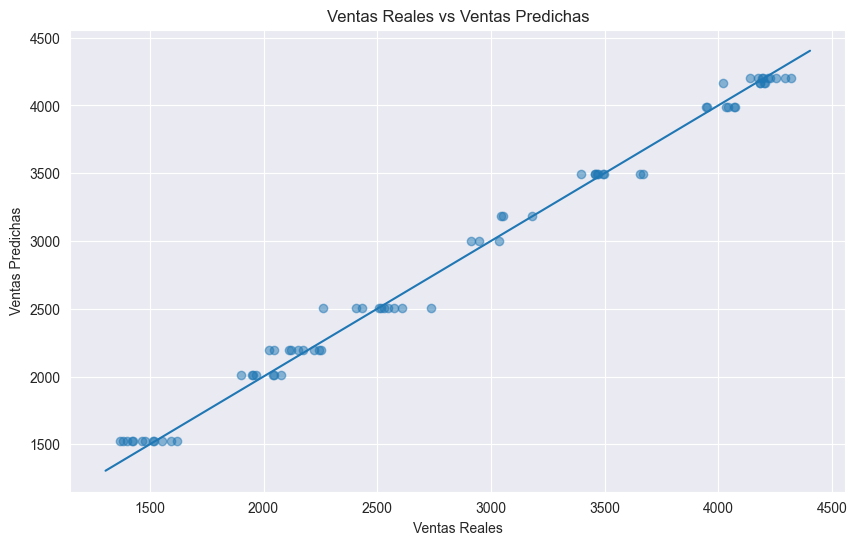

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba, predicciones_lineal, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas');

In [17]:
df_test = pd.DataFrame({'Real': y_prueba, 'Predicho': predicciones_lineal})
df_test = df_test.sort_index()

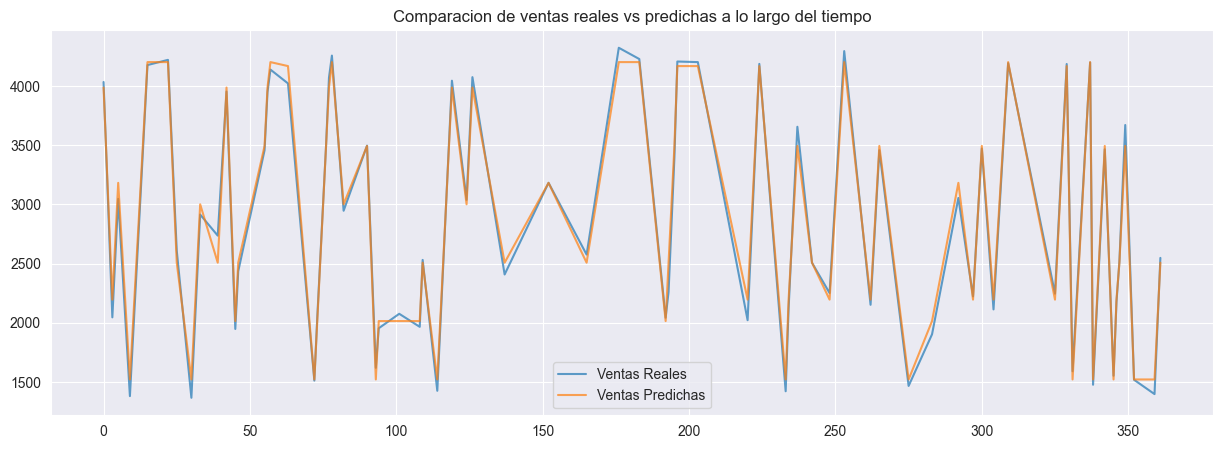

In [18]:
plt.figure(figsize = (15,5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha = 0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha = 0.7)
plt.legend()
plt.title('Comparacion de ventas reales vs predichas a lo largo del tiempo');


### 5. Conclusion

1. El primer grafico que muestra un diagrama de dispersion de las Ventas Reales vs Ventas Predichas, sugiere que el modelo de regresion lineal esta haciendo un buen trabajo al predecir las ventas. La linea de tendencia indica una fuerte relacion positiva entre los valores reales y predichos, lo que es un signo prometedor de que el modelo puede capturar la tendencia de las ventas con eficiencia.
2. El segundo grafico compara las Ventas Reales y las Ventas Predichas a lo largo del tiempo y tambien parece seguir un patron similar, aunque hay algunos puntos en los que las predicciones y los valores reales difieren significativamente. Esto puede deberse a eventos no capturados por las variables en tu modelo o a variaciones naturales en las ventas que no son predecibles.
3. Aqui hay algunas recomendaciones para la tienda minorista:
    * Optimizacion del inventario: Utiliza las predicciones para gestionar mejor el inventario. Las fechas predichas pueden requerir un stock adicional para mejorar la falta de productos.
    * Planificacion de personal: Ajusta los horarios del personal, segun dias festivos y no necesariamente segun dias de promociones.
    * Marketing Dirigido: Si identificas patrones de cuándo las ventas son mas fuertes, puedes dirigir las campañas de marketing para esos periodos y potencialmente aumentar aún más las ventas.
    * Analisis de Anomalias: Investiga aquellos puntos donde hay grandes desviaciones entre las ventas reales y las predichas para entender mejor los factores no capturados por el modelo.
    * Mejoras en el modelo: Considera incluir mas variables en el modelo que puedan afectar las ventas, como datos economicos generales, eventos locales, competencia, o incluso el clima.